In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# Discussion: Week 5

## Exercise: Two-Period Cake-Eating Problem

Recall the two-period cake-eating problem. A person has an initial quantity of cake $K_0>0$ and receives utility from consuming cake in period 0 and period 1:

\begin{align}
U(C_0,C_1) & = \log C_0 + \beta \log C_1.
\end{align}

The person chooses how much to consume in each period, $C_0$ and $C_1$, and a quantity of cake $K_1$ to carry forward from period 0 to maximize her utility subject to the following two budget constraints:

\begin{align}
C_0 + K_1 & = K_0\\
C_1 & = K_1,
\end{align}

where the boundary condition $K_2 = 0$ has been imposed. Use the budget constraints to substitute $C_0$ and $C_1$ out of the utility function. Then the maximization problem can be written concisely as a choice of just $K_1$: 

\begin{align}
\max_{K_1} \; \log (K_0-K_1) + \beta \log K_1
\end{align}

The first-order condition with respect to $K_1$ is:

\begin{align}
-\frac{1}{K_0-K_1} + \frac{\beta}{K_1} & = 0,
\end{align}

Given $K_1$, values for $C_0$ and $C_1$ are implied by the budget constraints

The function in the next cell computes the solution for the two-period cake-eating problem and provides an example of how to use the function.

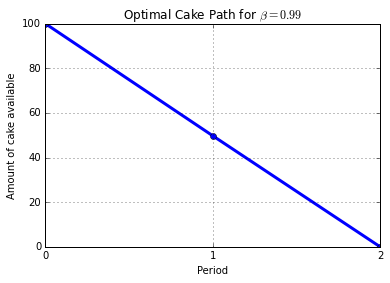

In [2]:
# Define a function to compute the solution for the two-period cake-eating problem. CELL PROVIDED.
def two_period_cake(beta,cake0):
    
    '''Function for computing solution to two-period cake-eating problem
    
            Args:
            beta (float):   subjective discount factor
            cake0 (float):  initial quantity of cake
            
        Returns:
            numpy array, numpy array
    '''
    
    # Initialize arrays for cake and consumption
    cake = np.zeros(3)
    consumption = np.zeros(2)
    
    # Assign values to cake array elements
    cake[0] = cake0
    cake[1] = beta/(1+beta)*cake[0]
    
    # Assign values to consumption array elements as implied by the budget constraints
    consumption[0] = cake[0]-cake[1]
    consumption[1] = cake[1]
    
    return cake,consumption


# Example of function use: Plot cake path for beta=0.99 and cake0=100
beta = 0.99
cake0 = 100

cake,consumption = two_period_cake(beta=beta,cake0=cake0)

plt.plot(cake,'-o',lw=3)
plt.title('Optimal Cake Path for $\\beta='+str(beta)+'$')
plt.xlabel('Period')
plt.ylabel('Amount of cake available')
plt.xticks(range(len(cake)))
plt.grid()

Suppose that the initial quantity of cake is $K_0 = 100$. For $\beta = 0, 0.25, 0.5, 0.75, 0.99, 1$, use the function `two_period_cake()` to plot the optimal path for the quantity of cake for periods 0 through 2. Add labels to the plot command so you know which line corresponds to which value of $\beta$.

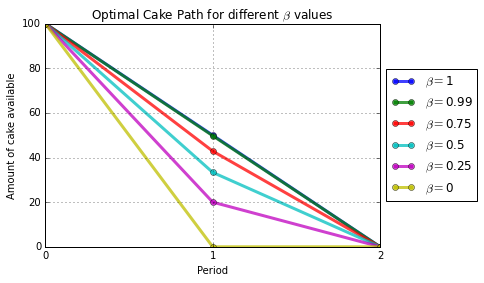

In [3]:
# Create a variable called 'cake0' that stores the initial quantity of cake
cake0=100

# Plot optimal path of cake for the different values of beta.
for beta in [1, 0.99, 0.75, 0.5, 0.25, 0]:
    
    cake,consumption = two_period_cake(beta=beta,cake0=cake0)
    plt.plot(cake,'o-',lw=3,alpha=0.75,label='$\\beta=$'+str(beta))
    
plt.title('Optimal Cake Path for different $\\beta$ values')
plt.xlabel('Period')
plt.ylabel('Amount of cake available')
plt.xticks(range(len(cake)))

# Put a legend to the right of the current axis. PROVIDED
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()

**Questions**

1. How does increasing $\beta$ affect the optimal path of $K$?
2. For $\beta=0$, $K_1 = 0$. Why does this make sense?

**Answers**

1. As $\beta$ increases, the person is placing more weight on the utility flow from consumption in period 1 and so the optimal path entails more cake saved for period 1 consummption. The path of cake is more smooth.<!-- answer -->
2. For $\beta=0$, the person places no weight on utility flow in period 1 and so the person consumes all of the cake in period 0. This person is very impatient!<!-- answer -->


## Exercise: Three-Period Cake-Eating Problem

Now consider a the three-period cake-eating problem. A person has an initial quantity of cake $K_0>0$ and receives utility from consuming cake in period 0, period 1, and period 2:

\begin{align}
U(C_0,C_1,C_2) & = \log C_0 + \beta \log C_1+ \beta^2 \log C_2.
\end{align}

The person chooses how much to consume in each period, $C_0$, $C_1$, and $C_2$, and quantities of cake $K_1$ and $K_2$ to carry foward from period 0 and from period 1 to maximize her utility subject to the following two budget constraints:

\begin{align}
C_0 + K_1 & = K_0\\
C_1 + K_2 & = K_1\\
C_2 & = K_2,
\end{align}

where the boundary condition $K_3 = 0$ has been imposed. Use the budget constraints to substitute $C_0$, $C_1$, and $C_2$ out of the utility function. Then the maximization problem can be written concisely as a choice of $K_1$ and $K_2$: 

\begin{align}
\max_{K_1,K_2} \; \log (K_0-K_1) + \beta\log (K_1-K_2) + \beta^2 \log K_2
\end{align}

The first-order conditions with respect to $K_1$ and $K_2$ are:

\begin{align}
-\frac{1}{K_0-K_1} + \frac{\beta}{K_1-K_2} & = 0\\
-\frac{1}{K_1-K_2} + \frac{\beta}{K_2} & = 0,
\end{align}

### Part (a)

Use the first-order conditions for the three-period cake-eating problem to solve by hand for:

1. $K_2$ as a function of $K_1$
2. $K_1$ as a function of $K_0$

Use what you derive in this part to do **Part (b)** and **Part (c)**.

### Part (b)

Copy and paste the full definition of the function `two_period_cake()` into the cell below and do the following:

1. Rename the function `three_period_cake`
2. Edit the function so that it computes the optimal path for the three-period problem

In [4]:
# Define a function to compute the solution for the three-period cake-eating problem. 
def three_period_cake(beta,cake0):
    
    '''Function for computing solution to three-period cake-eating problem
    
            Args:
            beta (float):   subjective discount factor
            cake0 (float):  initial quantity of cake
            
        Returns:
            numpy array, numpy array
    '''
    
    # Initialize arrays for cake and consumption. NOT PROVIDED
    cake = np.zeros(4)
    consumption = np.zeros(3)
    
    # Assign values to cake array elements. NOT PROVIDED
    cake[0] = cake0
    cake[1] = (beta+ beta**2)/(1+beta+beta**2)*cake[0]
    cake[2] = beta/(1+beta)*cake[1]
    
    # Assign values to consumption array elements as implied by the budget constraints. NOT PROVIDED
    consumption[0] = cake[0]-cake[1]
    consumption[1] = cake[1]-cake[2]
    consumption[2] = cake[2]
    
    return cake,consumption

### Part (c)

Suppose that the initial quantity of cake is $K_0 = 100$. For $\beta = 0, 0.25, 0.5, 0.75, 0.99, 1$, plot the optimal path for the quantity of cake for periods 0 through 3. Add labels to the plot command so you know which line corresponds to which value of $\beta$.

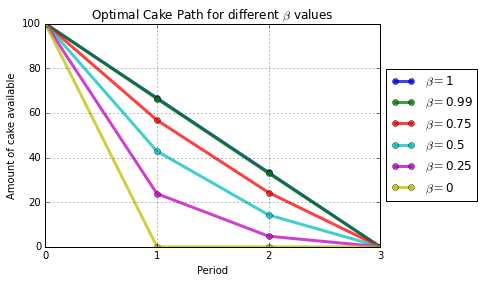

In [5]:
# Create a variable called 'cake0' that stores the initial quantity of cake
cake0=100

# Plot optimal path of cake for the different values of beta.
for beta in [1, 0.99, 0.75, 0.5, 0.25, 0]:
    
    cake,consumption = three_period_cake(beta=beta,cake0=cake0)
    plt.plot(cake,'o-',lw=3,alpha=0.75,label='$\\beta=$'+str(beta))
    
plt.title('Optimal Cake Path for different $\\beta$ values')
plt.xlabel('Period')
plt.ylabel('Amount of cake available')
plt.xticks(range(len(cake)))

# Put a legend to the right of the current axis. PROVIDED
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()